# Exploratory Data Analysis on Netflix TV Shows and Movies

In [48]:
# importing modules and packages
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import ast

# get directory name
path = os.path.dirname(os.path.realpath('__file__'))

In [3]:
# importing the csv dataset
data = pd.read_csv(path + '/titles.csv')

## Getting to know the Dataset

In [4]:
data.head()

id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent on seeing the Cahulawassee River before...          1972   
3  King Arthur, accompanied by his squire, recrui...          1975   
4  12 American military prisoners in World War II...          1967   

  age_certification  runtime                                       genres  \
0             TV-MA       51                            ['documentation']   
1                 R      114                           ['drama', 'crime']   
2                 R      109  ['drama', 'action', 'thriller', 'european']   
3                PG       91              ['fantasy', 'action', 'comedy']   
4               NaN      150                            ['war', 'action']   

  production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
0               ['US']      1.0        NaN         NaN         NaN   
1               ['US']      NaN  tt0075314         8.2    808582.0   
2               ['US']      NaN  tt0068473         7.7    107673.0   
3               ['GB']      NaN  tt0071853         8.2    534486.0   
4         ['GB', 'US']      NaN  tt0061578         7.7     72662.0   

   tmdb_popularity  tmdb_score  
0            0.600         NaN  
1           40.965       8.179  
2           10.010       7.300  
3           15.461       7.811  
4           20.398       7.600

In [5]:
data.shape

(5850, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

## Dataset Analysis

This dataset was uploaded by Victor Soeiro unto Kaggle. The link to the dataset can be accessed through here: https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies?datasetId=2178661&sortBy=dateCreated. In this dataset, there are a total of 15 columns and a brief description on each columns are detailed below:
* id: the title ID on JustWatch
* title: the name of the movie or TV show
* type: movie or TV show
* description: a brief description on the movie or TV show
* release_year: the release year
* age_certification: the age certification
* runtime: the length of the episode (TV show) or movie
* genres: a list of genres
* production_countries: a list of production countries that produced the TV show or movie
* seasons: number of seasons (only for TV show)
* imdb_id: the title ID on IMDB
* imdb_score: the score on IMDB
* imdb_votes: the votes on IMDB
* tmdb_popularity: popularity on TMDB
* tmdb_score: the score on TMDB


In [7]:
# Checking for null values
data.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

Out of 15 columns, there are 9 columns that has null values present. For each column, different methods will be used to handle the missing data.

1. Title. As there's only one row with a missing value for title, we'll remove that row from analysis.
2. Description. For this analysis, we'll not be looking into the description of each Netflix movie/shows hence we'll ignore this column and it's missing values.
3. Age Certification. There are a total of 5850 rows of data, 45% of the data is null. As the amount of missing data takes up almost half of the column, replacing it with normal mode imputation would affect the distribution of the data. Hence, this column will be left untouched.
4. Seasons. Majority (64%) of the data has null values 64% of the data has null values for seasons which is explainable as there will only be values present if the title is a TV show. We can ignore the null values as well.
5. IMDB_ID. For this analysis, imdb_id will not be needed hence we'll ignore the missing values.
6. imdb_score, imdb_votes, tmdb_popularity, tmdb_score: As there isn't much rows with missing values for these columns, we'll be using the mean/median imputation method.

In [8]:
data.describe()

# Looking at the distribution of percentile values from Min to Max for each column, we could briefly see a few columns
# that might have outlier values existing within. 

release_year      runtime      seasons   imdb_score    imdb_votes  \
count   5850.000000  5850.000000  2106.000000  5368.000000  5.352000e+03   
mean    2016.417094    76.888889     2.162868     6.510861  2.343938e+04   
std        6.937726    39.002509     2.689041     1.163826  9.582047e+04   
min     1945.000000     0.000000     1.000000     1.500000  5.000000e+00   
25%     2016.000000    44.000000     1.000000     5.800000  5.167500e+02   
50%     2018.000000    83.000000     1.000000     6.600000  2.233500e+03   
75%     2020.000000   104.000000     2.000000     7.300000  9.494000e+03   
max     2022.000000   240.000000    42.000000     9.600000  2.294231e+06   

       tmdb_popularity   tmdb_score  
count      5759.000000  5539.000000  
mean         22.637925     6.829175  
std          81.680263     1.170391  
min           0.009442     0.500000  
25%           2.728500     6.100000  
50%           6.821000     6.900000  
75%          16.590000     7.537500  
max        2274.044000    10.000000

In [9]:
# imdb_score is null and imdb_votes is null
# there's a chance that these shows does not exist on imdb 
# hence my first instinct was to see if these movies/shows has an imdb id
# 83.6% of rows of data that has null values for imdb score does not have imdb id
# the other 16.4% of data does not have null values for imdb id might not have high count of visits by web users (which might show null values for score and votes)

data[data['imdb_score'].isna()].describe()

release_year     runtime     seasons  imdb_score  imdb_votes  \
count    482.000000  482.000000  167.000000         0.0         0.0   
mean    2017.732365   58.251037    1.359281         NaN         NaN   
std        5.981342   37.381959    1.188406         NaN         NaN   
min     1945.000000    0.000000    1.000000         NaN         NaN   
25%     2018.000000   29.250000    1.000000         NaN         NaN   
50%     2019.000000   47.500000    1.000000         NaN         NaN   
75%     2020.000000   85.000000    1.000000         NaN         NaN   
max     2022.000000  240.000000   12.000000         NaN         NaN   

       tmdb_popularity  tmdb_score  
count       466.000000  394.000000  
mean         13.164983    6.898472  
std          45.854804    1.453712  
min           0.009442    0.500000  
25%           1.566500    6.025000  
50%           3.058500    7.000000  
75%           8.626500    7.800000  
max         511.033000   10.000000

In [10]:
data[data['imdb_score'].isna()]['imdb_id'].count()

79

In [11]:
# there isn't any interesting insights or reasons into why imdb_votes is null when comparing the stats between null 
# imdb votes and not null imdb votes.
data[data['imdb_votes'].isna()].describe()

release_year     runtime     seasons  imdb_score  imdb_votes  \
count    498.000000  498.000000  167.000000   16.000000         0.0   
mean    2017.783133   57.781124    1.359281    6.593750         NaN   
std        5.910564   37.300324    1.188406    1.045925         NaN   
min     1945.000000    0.000000    1.000000    4.300000         NaN   
25%     2018.000000   29.000000    1.000000    6.125000         NaN   
50%     2019.000000   47.000000    1.000000    6.700000         NaN   
75%     2020.000000   84.750000    1.000000    7.550000         NaN   
max     2022.000000  240.000000   12.000000    7.800000         NaN   

       tmdb_popularity  tmdb_score  
count       480.000000  408.000000  
mean         13.108129    6.879022  
std          45.212519    1.435755  
min           0.009442    0.500000  
25%           1.589750    6.000000  
50%           3.091500    7.000000  
75%           9.048500    7.700000  
max         511.033000   10.000000

In [12]:
data[~data['imdb_votes'].isna()].describe()

release_year      runtime      seasons   imdb_score    imdb_votes  \
count   5352.000000  5352.000000  1939.000000  5352.000000  5.352000e+03   
mean    2016.289985    78.666854     2.232078     6.510613  2.343938e+04   
std        7.012629    38.683360     2.769952     1.164240  9.582047e+04   
min     1954.000000     0.000000     1.000000     1.500000  5.000000e+00   
25%     2016.000000    45.000000     1.000000     5.800000  5.167500e+02   
50%     2018.000000    86.000000     1.000000     6.600000  2.233500e+03   
75%     2020.000000   105.000000     2.500000     7.300000  9.494000e+03   
max     2022.000000   225.000000    42.000000     9.600000  2.294231e+06   

       tmdb_popularity   tmdb_score  
count      5279.000000  5131.000000  
mean         23.504435     6.825211  
std          84.165807     1.146735  
min           0.600000     1.000000  
25%           2.938500     6.100000  
50%           7.173000     6.900000  
75%          17.213500     7.500000  
max        2274.044000    10.000000

## Function 

In [13]:
# This function helps to get the first element of each list
def get_first_list_element(row):
    eval_list = ast.literal_eval(row)
    if len(eval_list) > 0:
        firstitem = eval_list[0]
    else:
        firstitem = None
    return firstitem

## Filling Missing Values

Mean/median imputation methods were chosen to replace the missing values for these columns: imdb_score, imdb_votes, tmdb_popularity and tmdb_score. For imdb_score and tmdb_score, the missing values will be replaced with the mean imputation method as their data distribution are close to a normal distribution. While for the imdb_votes and tmdb_popularity, the missing values will be replaced with the median imputation method as their data distribution are highly skewed to the right. 

In [14]:
data['imdb_score'] = data['imdb_score'].fillna(data['imdb_score'].mean())
data['imdb_votes'] = data['imdb_votes'].fillna(data['imdb_votes'].median())
data['tmdb_popularity'] = data['tmdb_popularity'].fillna(data['tmdb_popularity'].median())
data['tmdb_score'] = data['tmdb_score'].fillna(data['tmdb_score'].mean())

## Creating New Columns

Both of the columns, genre and production_countries, stores a list of genres and production countries of the TV shows and movies, respectively. This section will utilize the function written (in the function section) to extract the first elements of each list in each row. This method is utilized to assume that the first genre or the first production country mentioned in each list are the main values.

In [15]:
data['main_genre'] = data.apply(lambda row: get_first_list_element(row['genres']), axis=1)
data['main_production_countries'] = data.apply(lambda row: get_first_list_element(row['production_countries']), axis=1)

## Detecting Outliers (with Boxplot)

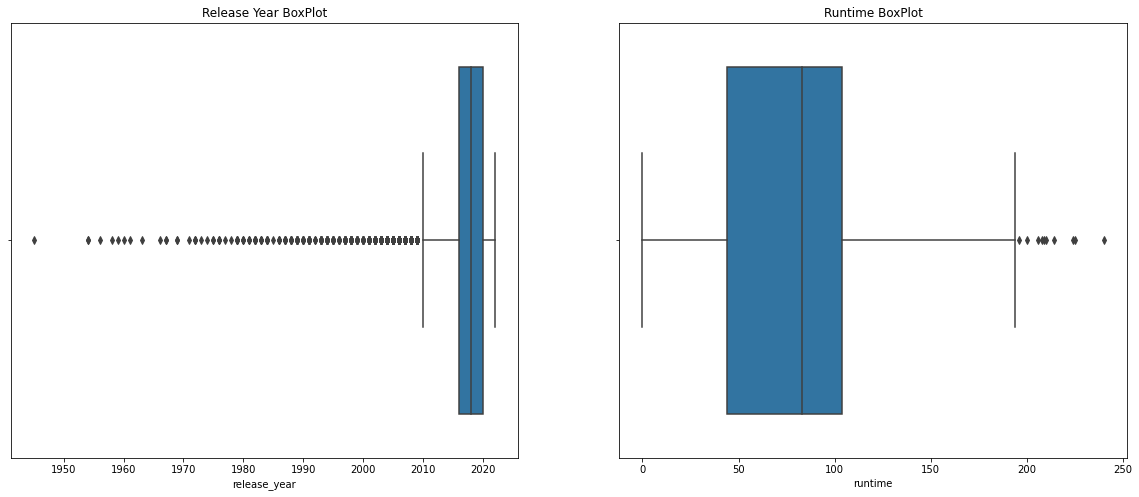

<Figure size 432x288 with 0 Axes>

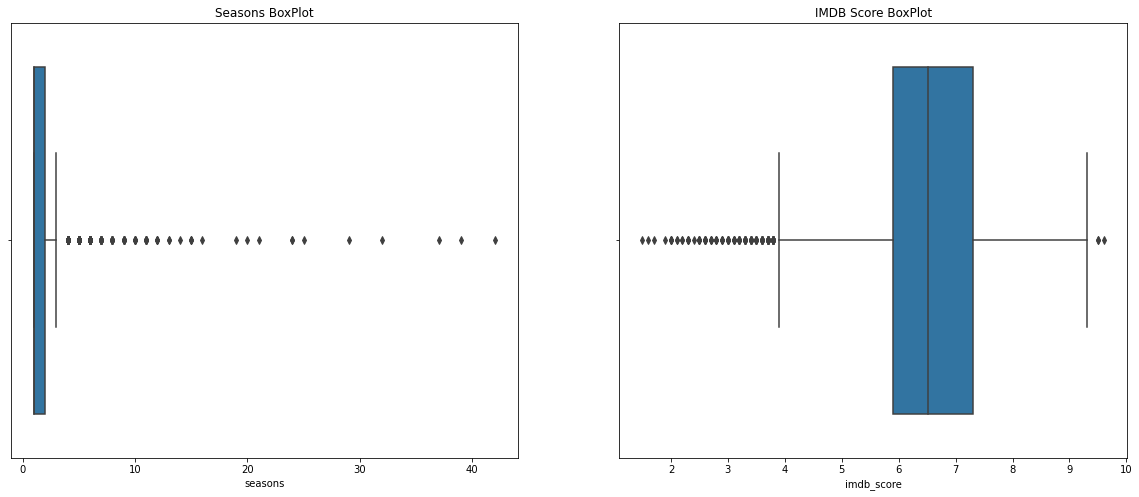

<Figure size 432x288 with 0 Axes>

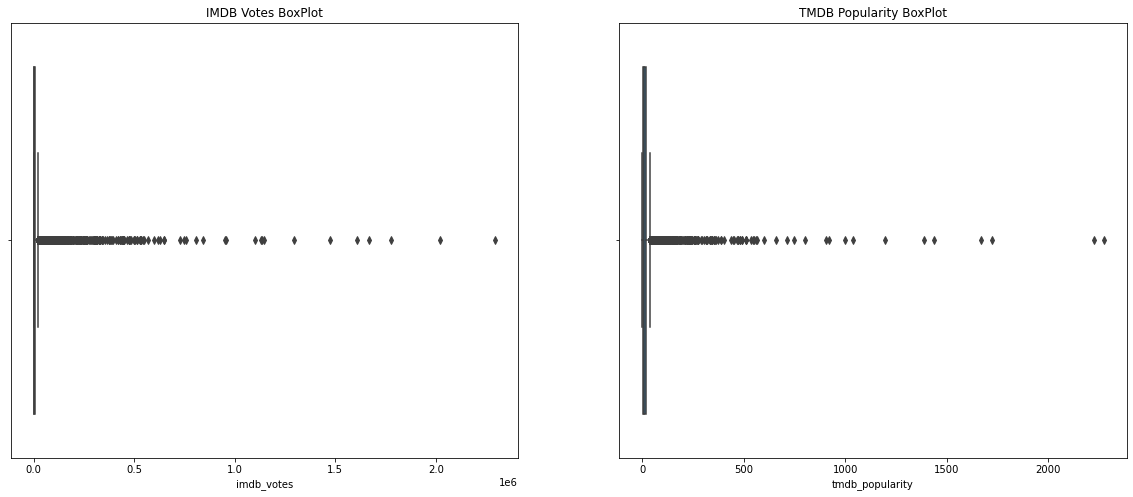

<Figure size 432x288 with 0 Axes>

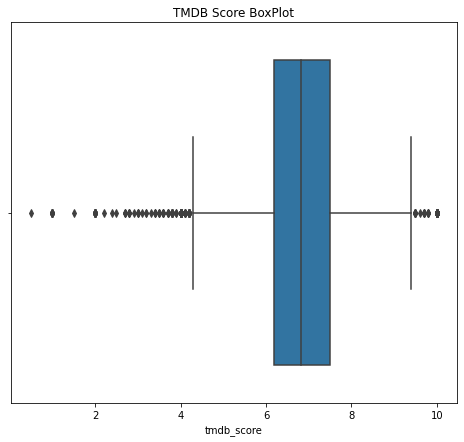

<Figure size 432x288 with 0 Axes>

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.boxplot(x=data['release_year'], orient='h', ax=ax1).set(title='Release Year BoxPlot')
sns.boxplot(x=data['runtime'], orient='h', ax=ax2).set(title='Runtime BoxPlot')
plt.show()
plt.tight_layout()

fig, (ax3, ax4) = plt.subplots(1,2, figsize=(20,8))
sns.boxplot(x=data['seasons'], orient='h', ax=ax3).set(title='Seasons BoxPlot')
sns.boxplot(x=data['imdb_score'], orient='h', ax=ax4).set(title='IMDB Score BoxPlot')
plt.show()
plt.tight_layout()

fig, (ax5, ax6) = plt.subplots(1,2, figsize=(20,8))
sns.boxplot(x=data['imdb_votes'], orient='h', ax=ax5).set(title='IMDB Votes BoxPlot')
sns.boxplot(x=data['tmdb_popularity'], orient='h', ax=ax6).set(title='TMDB Popularity BoxPlot')
plt.show()
plt.tight_layout()

fig, ax = plt.subplots(figsize=(8,7))
sns.boxplot(x=data['tmdb_score'], orient='h', ax=ax).set(title='TMDB Score BoxPlot')
plt.show()
plt.tight_layout()

All of the plots above are evidently showing the presence of outliers. The column with the least outliers is runtime. 

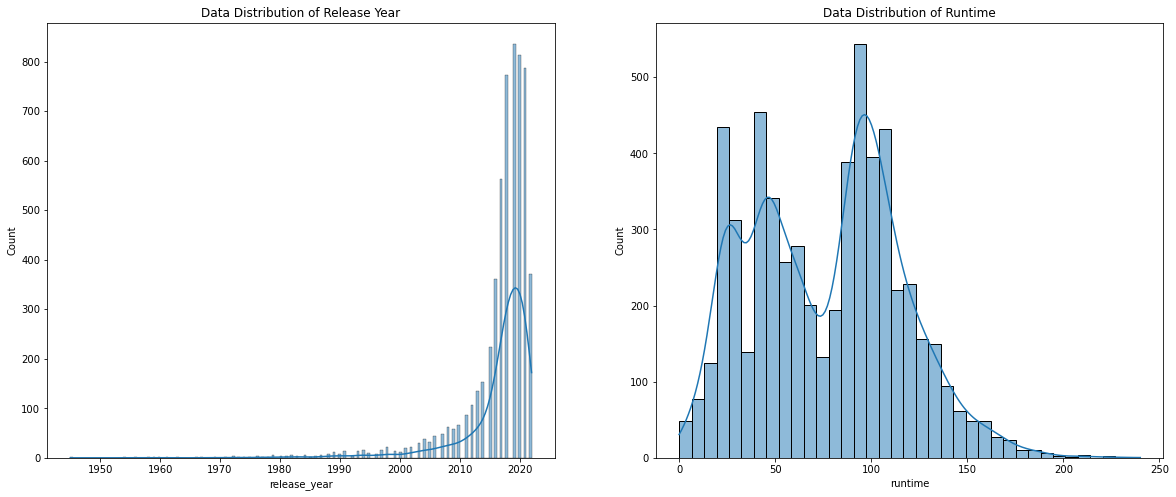

<Figure size 432x288 with 0 Axes>

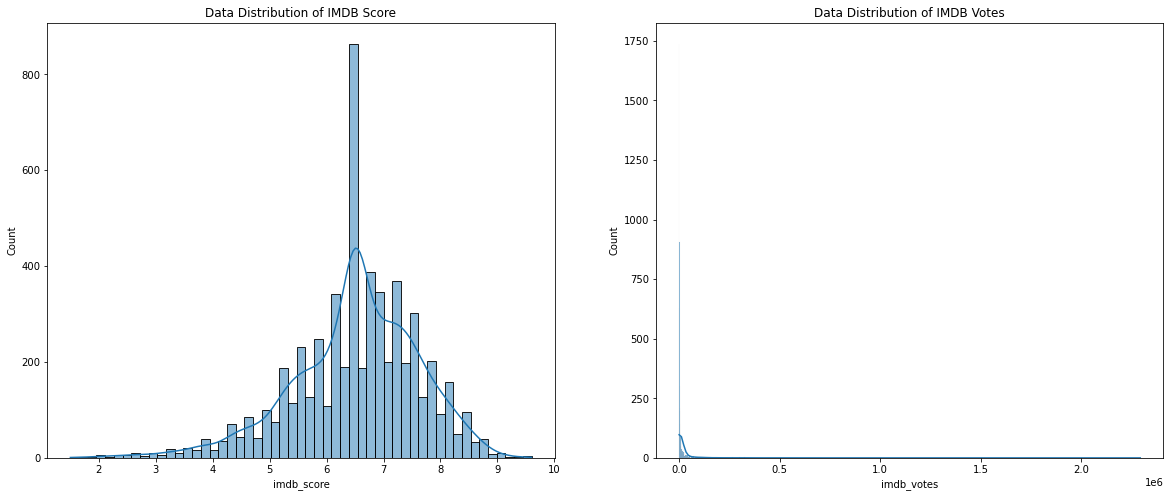

<Figure size 432x288 with 0 Axes>

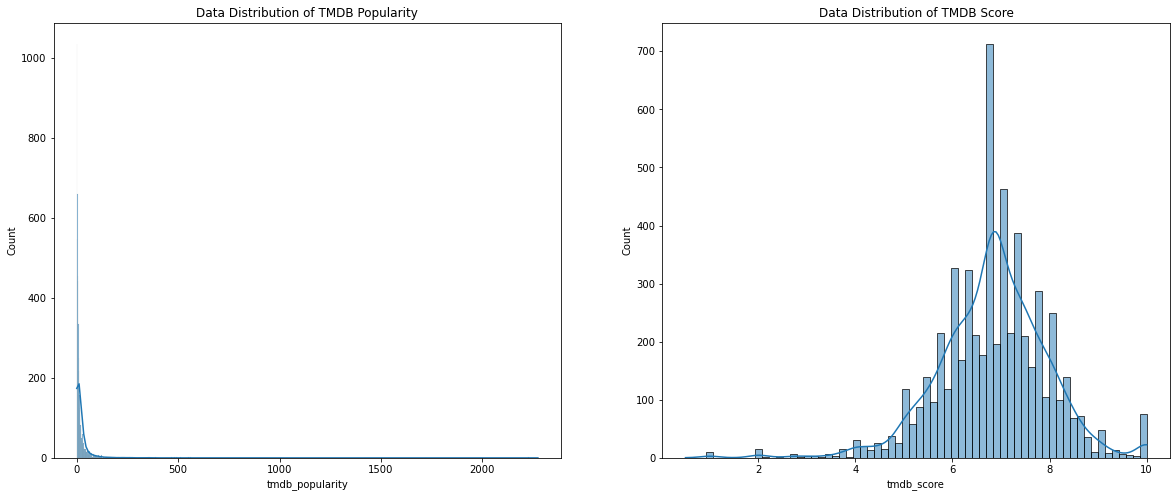

<Figure size 432x288 with 0 Axes>

In [17]:
# DATA DISTRIBUTION PLOT
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.histplot(x=data['release_year'], ax=ax1, kde=1).set(title='Data Distribution of Release Year')
sns.histplot(data=data, x='runtime', ax=ax2, kde=1).set(title='Data Distribution of Runtime')
plt.show()
plt.tight_layout()

fig, (ax3, ax4) = plt.subplots(1,2, figsize=(20,8))
sns.histplot(x=data['imdb_score'], ax=ax3, kde=1).set(title='Data Distribution of IMDB Score')
sns.histplot(x=data['imdb_votes'], ax=ax4, kde=1).set(title='Data Distribution of IMDB Votes')
plt.show()
plt.tight_layout()

fig, (ax5, ax6) = plt.subplots(1,2, figsize=(20,8))
sns.histplot(x=data['tmdb_popularity'], ax=ax5, kde=1).set(title='Data Distribution of TMDB Popularity')
sns.histplot(x=data['tmdb_score'], ax=ax6, kde=1).set(title='Data Distribution of TMDB Score')
plt.show()
plt.tight_layout()

Release Year: Based on the data distribution, we could see a rising in the amount of movies and tv shows produced as time goes on. 
Runtime: The data distribution is showing a trimodal distribution. This might mean that the data distribution might be separated into different groups of data based on other data features.
IMDB Score: The plot is showing a near to normal distribution.
IMDB Votes: The data distribution of IMDB votes is heavily skewed to the right. Based on the box plot above, we can confirm that the dataset has very few amounts of TV shows or movies that has high votes while the majority of the data has lower votes.
TMDB Popularity: TMDB popularity's data distribution is also showing a similar distribution to IMDB Votes.
TMDB Score: The plot is almost resembling a normal data distribution.

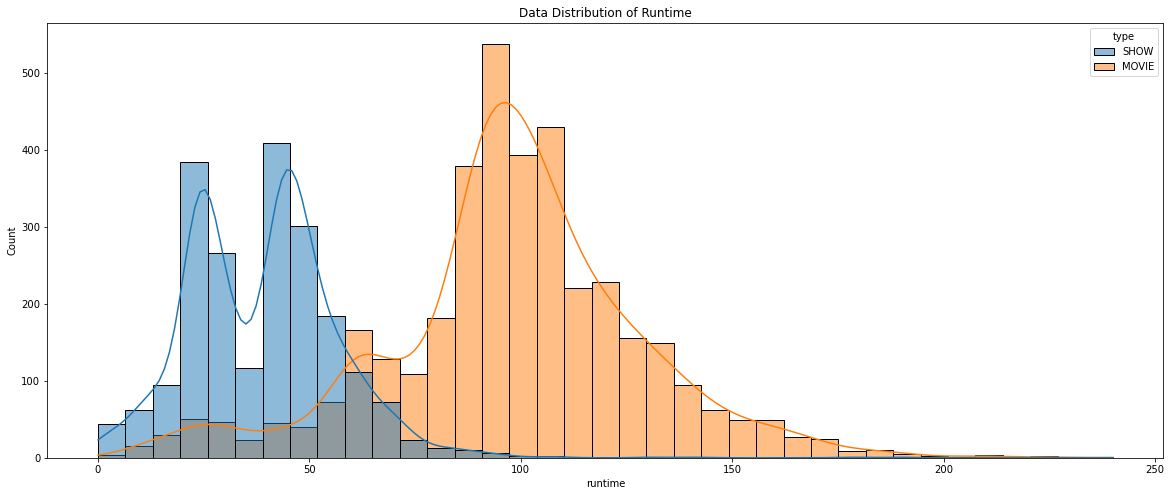

In [23]:
# Further Analysis into Runtime's Trimodal Distribution
fig, ax1 = plt.subplots(figsize=(20,8))
sns.histplot(data=data, x='runtime', kde=1, hue='type', ax=ax1).set(title='Data Distribution of Runtime')
plt.show()

In this dataset, we have a combination of data on Netflix TV shows and movies. By applying the type column as a hue parameter, we could see the different groups of data by either SHOW or MOVIE. The runtime data distribution on SHOWs are showing a bimodal distribution which indicates there's two most common runtime on TV shows. MOVIEs data distribution perceives as a close to normal distribution.

In [44]:
# PIE VISUAL
fig = plt.figure(figsize=(17,9), dpi=1600)

ax1 = plt.subplot2grid((2,4),(0,0))
type_counts = data.groupby(['type']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index(drop=True)
plt.pie(x=type_counts['counts'], labels=type_counts['type'], autopct='%.0f%%', radius = 1.2)
plt.title('Type')

ax2 = plt.subplot2grid((2, 4), (0, 1))
age_cert_counts = data.groupby(['age_certification']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index(drop=True)
plt.pie(x=age_cert_counts['counts'], labels=age_cert_counts['age_certification'], autopct='%.0f%%', radius = 1.2)
plt.title('Age Certifications')

fig.set_facecolor('white')

Type: 64% of the titles on Netflix are movies while the other 36% are TV shows. The amount of data on movies are almost doubled of the amount of data on TV shows.
Age Certifications: The top 3 most-produced age-certificated titles are TV-MA, R and TV-14. Netflix are releasing more contents that are suitable for the adults or teenagers that are over the age of 14 due to the mature themes present in the show or movie.

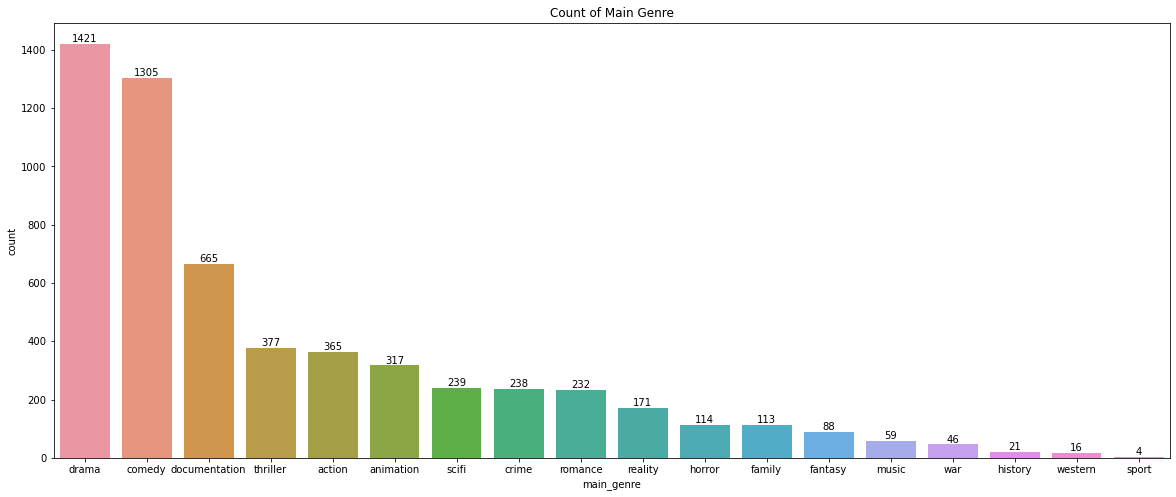

In [19]:
# BAR VISUAL
fig, ax1 = plt.subplots(figsize=(20,8))
main_genre_count = sns.countplot(data=data, x='main_genre', order=data['main_genre'].value_counts().index, ax=ax1)
main_genre_count.bar_label(main_genre_count.containers[0], label_type='edge')
main_genre_count.set_title('Count of Main Genre')
plt.show()

Main Genre: The top 3 main genres that are on Netflix are drama, comedy and documentation.

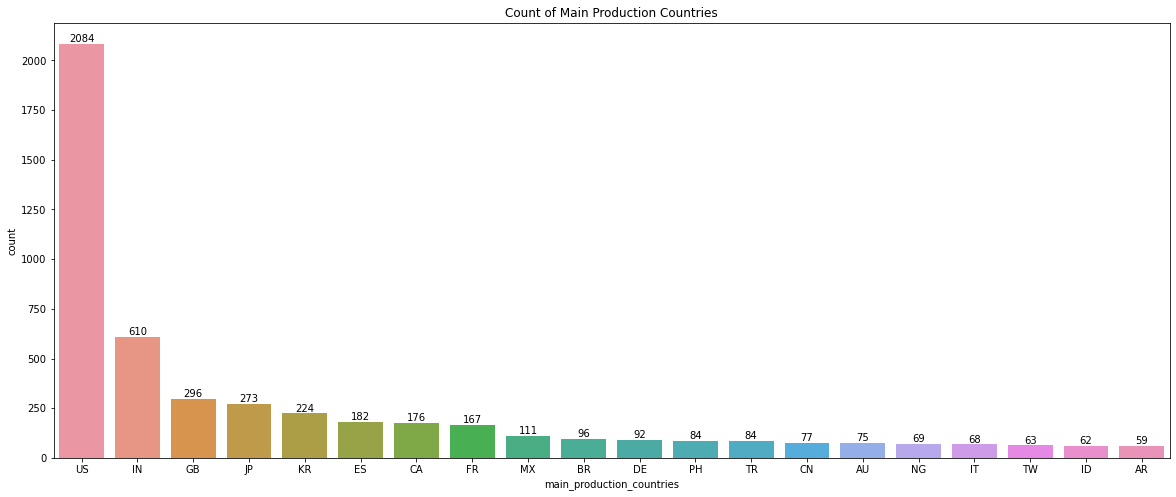

In [150]:
fig, ax1 = plt.subplots(figsize=(20,8))
main_country_count = sns.countplot(data=data, x='main_production_countries', order=data['main_production_countries'].value_counts()[:20].index, ax=ax1)
main_country_count.bar_label(main_country_count.containers[0], label='edge')
main_country_count.set_title('Count of Main Production Countries')
plt.show()

Main Production Countries: From the above plot, we could see that the United States is the country that produced most of the titles on Netflix.

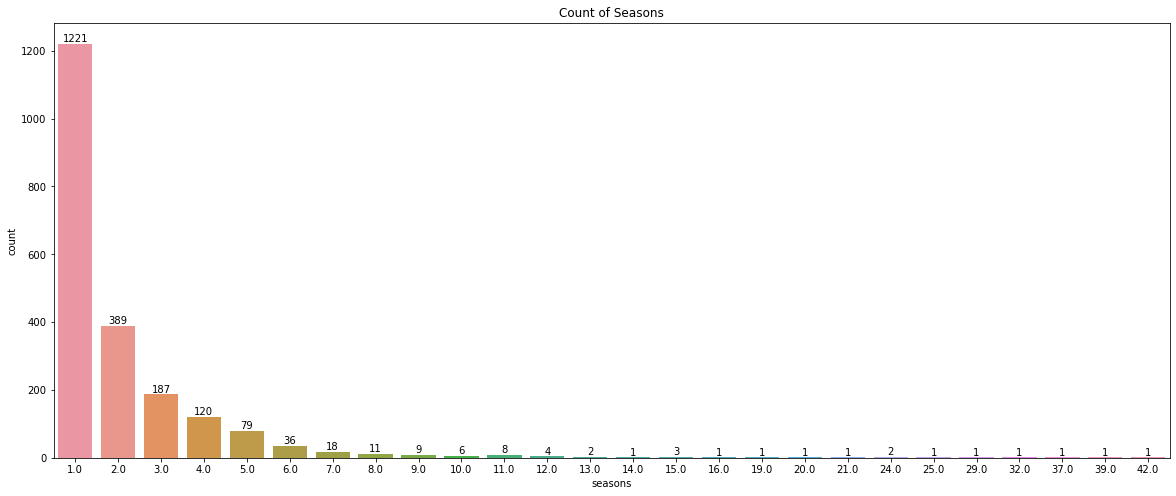

In [22]:
fig, ax1 = plt.subplots(figsize=(20,8))
seasons_count = sns.countplot(data=data, x='seasons', ax = ax1)
seasons_count.bar_label(seasons_count.containers[0], label='edge')
seasons_count.set_title('Count of Seasons')
plt.show()

Seasons: Netflix shuts down the production of most TV shows after their first season. These TV series might have been cancelled due to their low viewership that brings in lower profits.

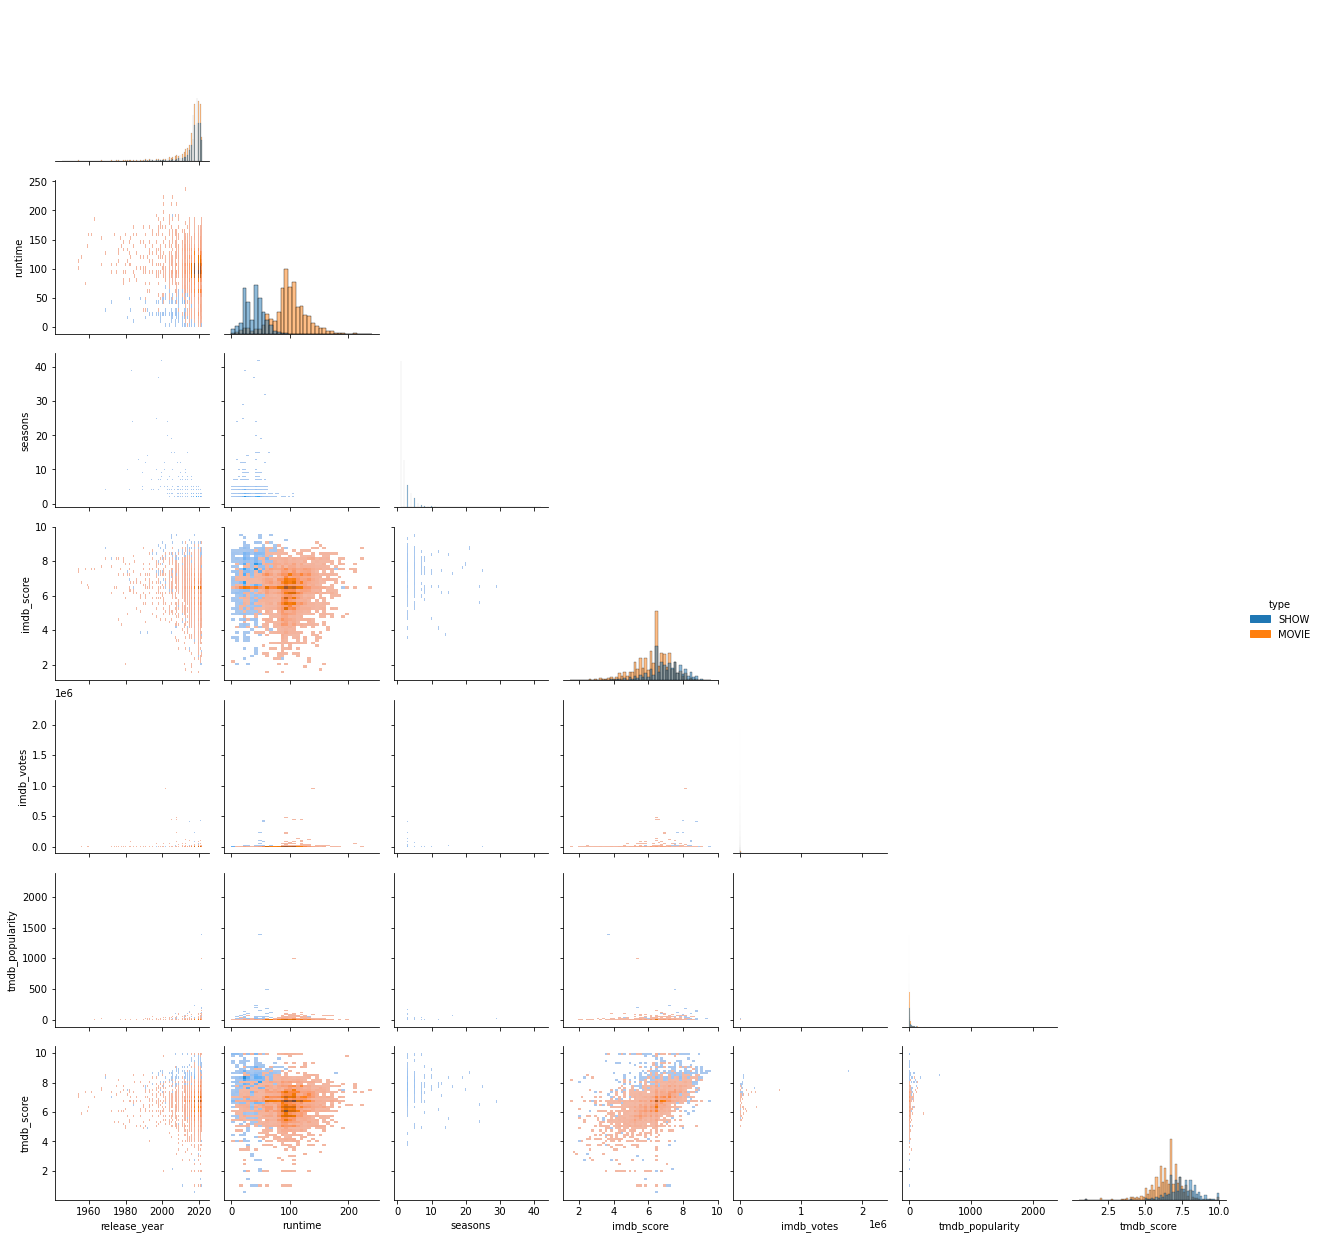

In [26]:
# BIVARIATE ANALYSIS
sns.pairplot(data=data, kind='hist', corner=True, hue='type')

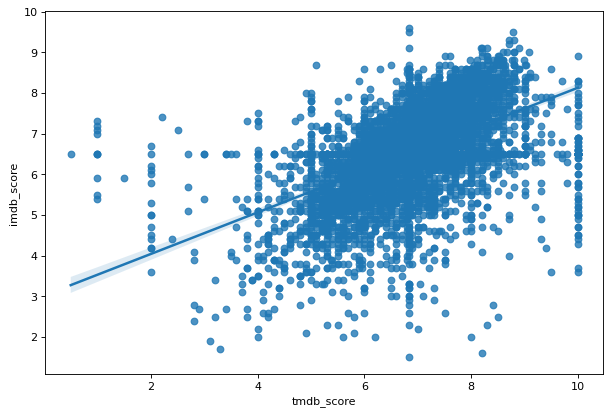

In [51]:
# Analysis between imdb_score and tmdb_score
figure(figsize=(9, 6), dpi=80)
sns.regplot(data=data, x='tmdb_score', y='imdb_score')
plt.show()

Based on the plot above, we could see that the features, imdb_score and tmdb_score, are correlated. As the tmdb_score increases, the imdb_score increases as well.

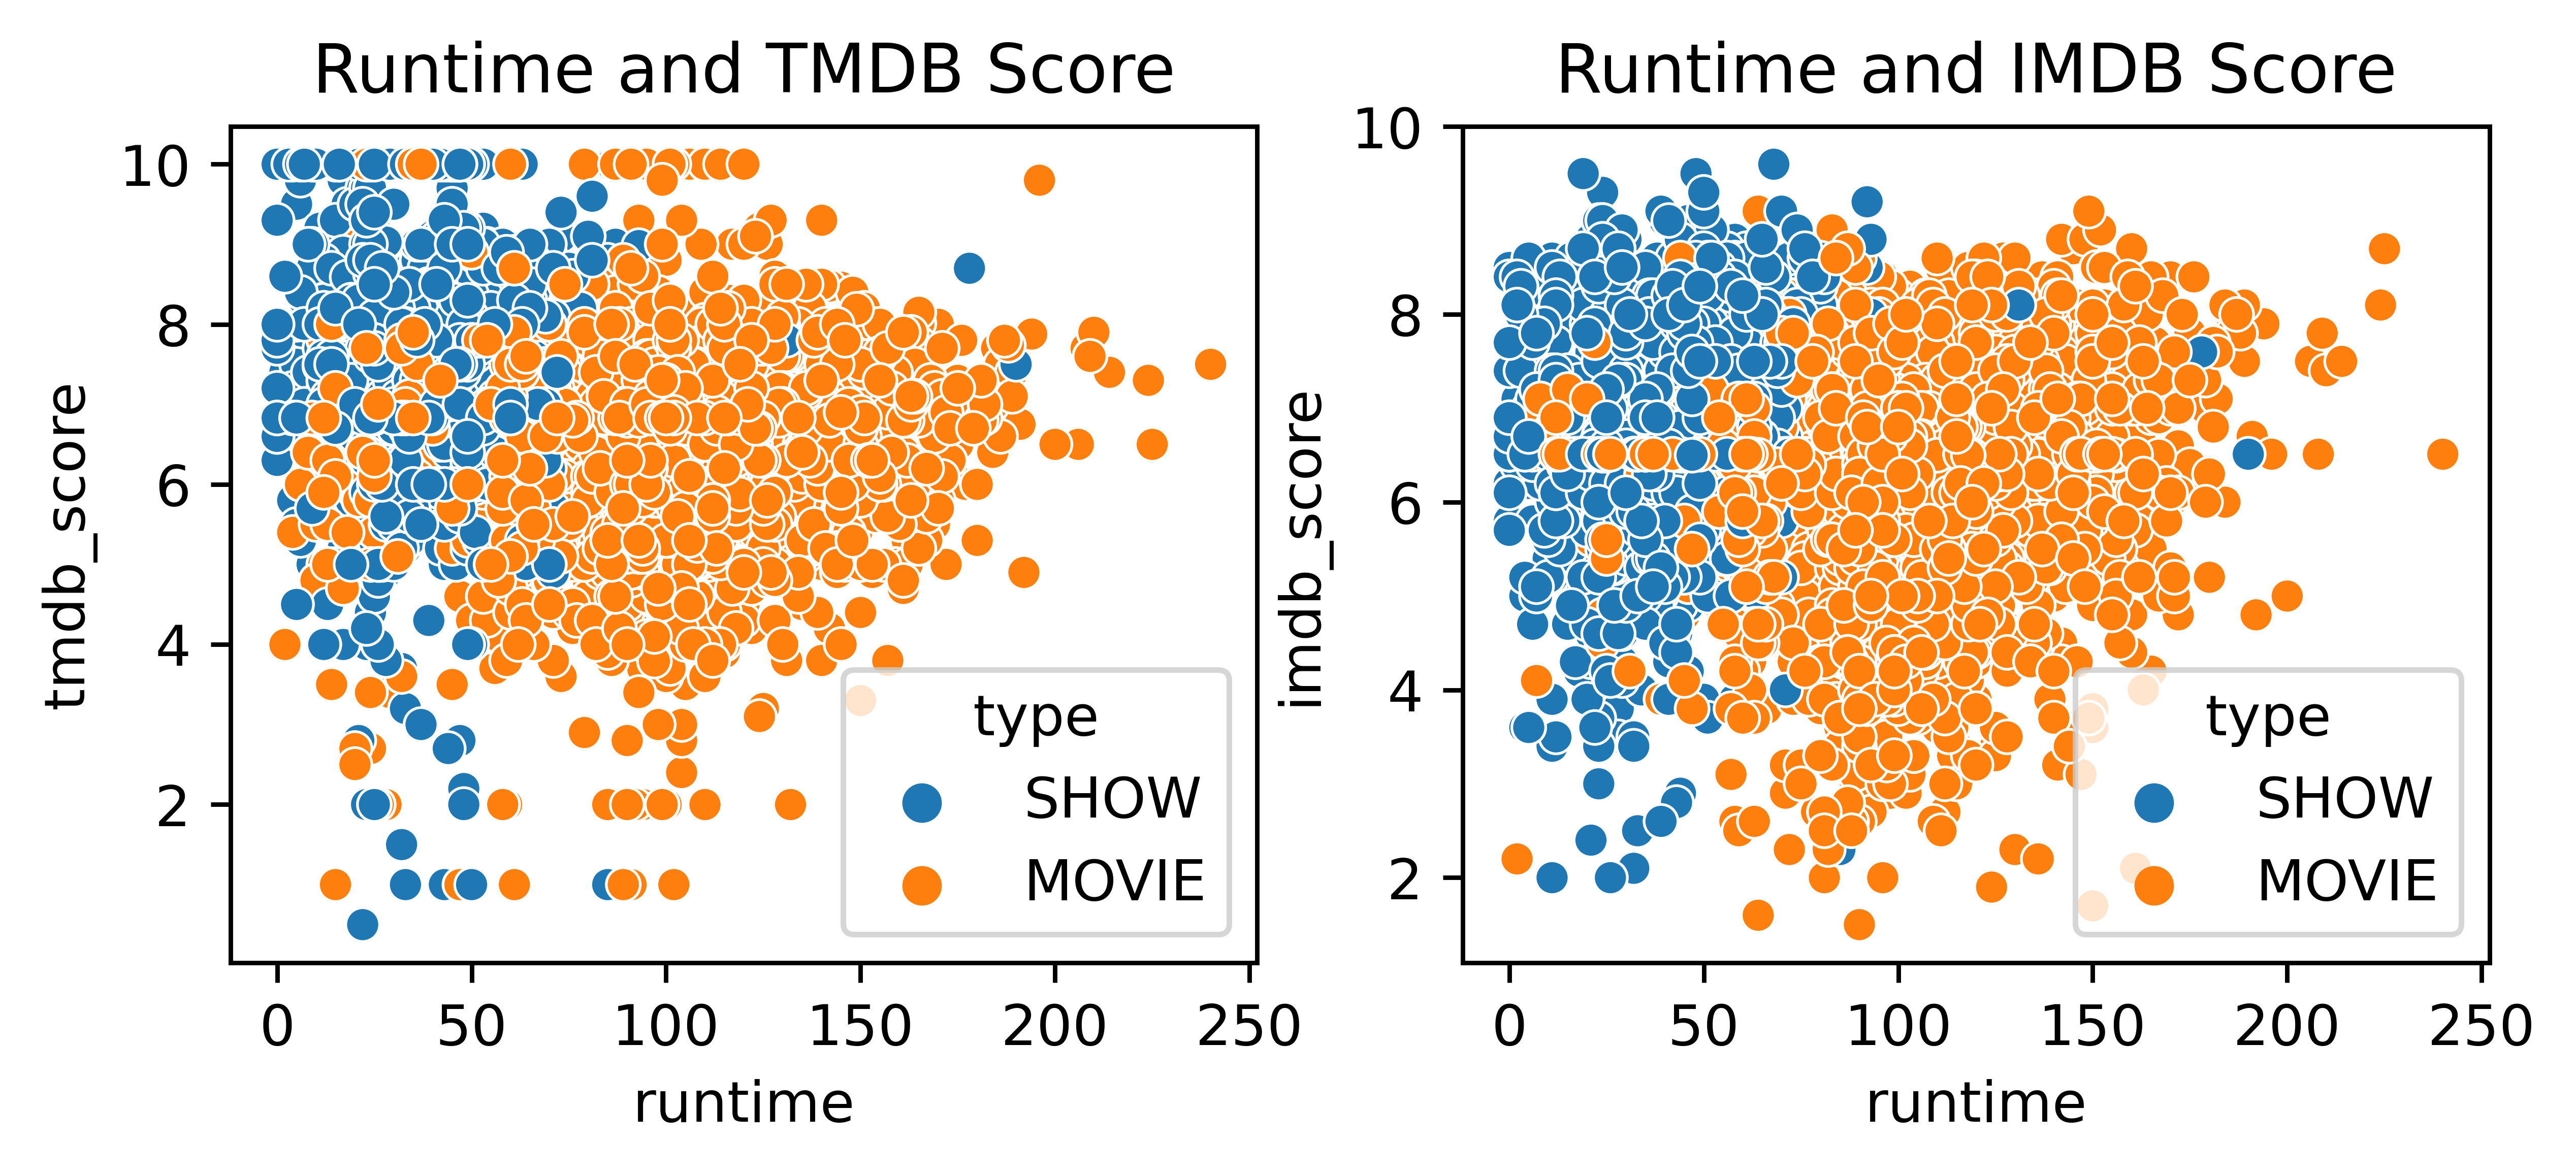

In [60]:
# Analaysis between runtime, tmdb_score and imdb_score
fig = plt.figure(figsize=(15,6), dpi=800)

ax1 = plt.subplot2grid((2,4),(0,0))
sns.scatterplot(data=data, x='runtime', y='tmdb_score', hue='type', ax=ax1)
plt.title('Runtime and TMDB Score')

ax2 = plt.subplot2grid((2, 4), (0, 1))
sns.scatterplot(data=data, x='runtime', y='imdb_score', hue='type', ax=ax2)
plt.title('Runtime and IMDB Score')
plt.show()

As both tmdb_score and imdb_score are correlated, we could see similar patterns when we compare tmdb_score / imdb_score vs runtime whilst adding in type categorization. TV shows with lesser runtime has higher scores (in both tmdb and imdb) compared to movies that has longer runtime. This makes sense as the total runtime of TV shows are much longer than one movie therefore they had the time to dwell more into the development of the character, the plot of the story etc.

In [97]:
# PIE VISUAL on Main Genre's Total Sum of IMDB score and TMDB score
fig = plt.figure(figsize=(15,9), dpi=1600)

ax1 = plt.subplot2grid((1,2),(0,0))
# Making Main Genre's Dataframe
genre_tmdb = data.groupby(['main_genre'])['tmdb_score'].sum().reset_index()
genre_tmdb['tmdb_score'] = genre_tmdb['tmdb_score'].round(1)

othergenre_tmdb = genre_tmdb.sort_values(by='tmdb_score', ascending=False)[7:]['tmdb_score'].sum().round(1)
top7genre_tmdb = genre_tmdb.sort_values(by='tmdb_score', ascending=False)[:7].reset_index(drop=True)
top7genre_tmdb.loc[len(top7genre_tmdb.index)] = ['Other Genres', othergenre_tmdb] 

top7genre_tmdb['main_genre'] = top7genre_tmdb['main_genre'].str.title()
plt.pie(x=top7genre_tmdb['tmdb_score'], labels=top7genre_tmdb['main_genre'], autopct='%.0f%%', radius = 1.2)
plt.title("Main Genre's TMDB Scores")

ax2 = plt.subplot2grid((1, 2), (0, 1))
genre_imdb = data.groupby(['main_genre'])['imdb_score'].sum().reset_index()
genre_imdb['imdb_score'] = genre_imdb['imdb_score'].round(1)

othergenre_imdb = genre_imdb.sort_values(by='imdb_score', ascending=False)[7:]['imdb_score'].sum().round(1)
top7genre_imdb = genre_imdb.sort_values(by='imdb_score', ascending=False)[:7].reset_index(drop=True)
top7genre_imdb.loc[len(top7genre_imdb.index)] = ['Other Genres', othergenre_imdb] 

top7genre_imdb['main_genre'] = top7genre_imdb['main_genre'].str.title()
plt.pie(x=top7genre_imdb['imdb_score'], labels=top7genre_imdb['main_genre'], autopct='%.0f%%', radius = 1.2)
plt.title("Main Genre's IMDB Scores")

fig.set_facecolor('white')

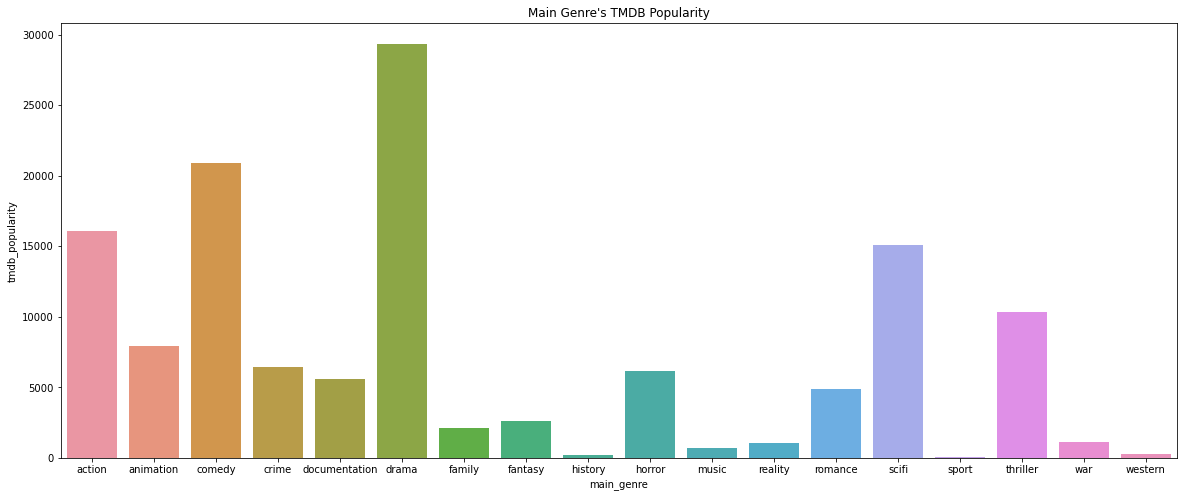

In [100]:
genre_popularity = data.groupby(['main_genre'])['tmdb_popularity'].sum().reset_index()
genre_popularity['tmdb_popularity'] = genre_popularity['tmdb_popularity'].round(1)

plt.figure(figsize=(20,8))
sns.barplot(data=genre_popularity, x='main_genre', y='tmdb_popularity')
plt.title("Main Genre's TMDB Popularity")
plt.show()

As Netflix produces more titles on genres such as drama, comedy and documentation, the total summation of TMDB scores and IMDB scores would be much higher than other genres. However, if we looked at the main genre's popularity on TMDB, the top 3 most popular genres are drama, comedy and action. Although there are a lot of documentations available for viewing on Netflix, this popularity of documentations are not high. 

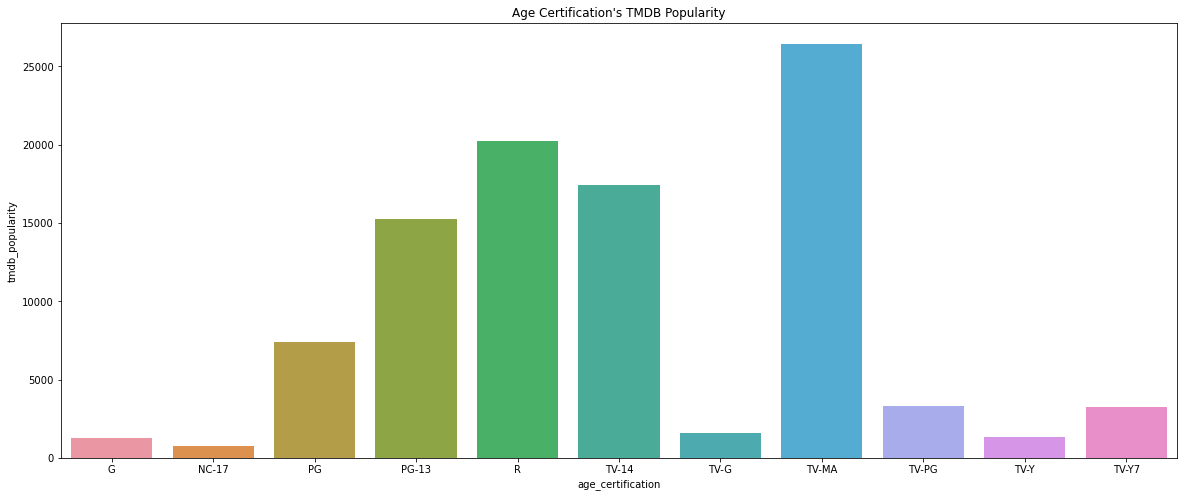

In [103]:
# BAR VISUAL on Age Certification and TMDB Popularity
agecert_popularity = data.groupby(['age_certification'])['tmdb_popularity'].sum().reset_index()
agecert_popularity['tmdb_popularity'] = agecert_popularity['tmdb_popularity'].round(1)

plt.figure(figsize=(20,8))
sns.barplot(data=agecert_popularity, x='age_certification', y='tmdb_popularity')
plt.title("Age Certification's TMDB Popularity")
plt.show()

The top 3 most popular age certificated titles on Netflix are TV-MA, R and TV-14 based on the sum of TMDB Popularity. 

In [127]:
agecert_score = data.groupby(['age_certification'])['imdb_score'].mean().reset_index()
agecert_score['imdb_score'] = agecert_score['imdb_score'].round(1)

agecert_score_tmdb = data.groupby(['age_certification'])['tmdb_score'].mean().reset_index()
agecert_score_tmdb['tmdb_score'] = agecert_score_tmdb['tmdb_score'].round(1)

fig = plt.figure(figsize=(15,6), dpi=1600)
ax1 = plt.subplot2grid((1,2),(0,0))
agecert_imdb_plot = sns.barplot(data=agecert_score, x='age_certification', y='imdb_score', ax=ax1)
agecert_imdb_plot.bar_label(agecert_imdb_plot.containers[0], label='edge')
plt.title("Age Certification's IMDB Scores")

ax2 = plt.subplot2grid((1,2),(0,1))
agecert_tmdb_plot = sns.barplot(data=agecert_score_tmdb, x='age_certification', y='tmdb_score', ax=ax2)
agecert_tmdb_plot.bar_label(agecert_tmdb_plot.containers[0], label='edge')
plt.title("Age Certification's TMDB Scores")
plt.show()

On the average of IMDB scores for each age certification, the top 3 most highly averaged scored age certificated titles are TV-14, TV-MA and TV-PG. Two of these age certifications are both included in the top 3 most produced age certificated Netflix titles. 

Whilst on the bar chart on the average of TMDB scores on age certification, we could see the overall average scores are higher than the IMDB scores. However, the top 4 most highly-rated average TMDB score age certificated titles are TV-Y, TV-Y7 and TV-14 and TV-G (tied). 

IMDB users tends to rate higher scores for titles that are for mature audiences while TMDB users gives higher ratings to titles that are suitable for general audienced and childrens.